In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("./utils")
pd.options.plotting.backend = "plotly"

In [2]:
import loader
import round_classifier
import thresholds
from Parser import Parser

In [3]:
all_data = loader.load_dataset()

In [4]:
all_columns = all_data.columns
all_columns[0:16]

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive'],
      dtype='object')

In [139]:
def assemble_df_weapons(_df, _weapons):
    pre_df = {}
    for i, weapon in enumerate(_weapons):
        key = weapon.replace("ct_weapon_", "").replace("t_weapon_", "")
        pre_df[key] = _df[weapon]
    return pd.DataFrame(pre_df)


def assemble_df_grenades(_df, _grenades):
    pre_df = {}
    for i, grenade in enumerate(_grenades):
        key = grenade.replace("ct_grenade_", "").replace("t_grenade_", "")
        pre_df[key] = _df[grenade]
    return pd.DataFrame(pre_df)

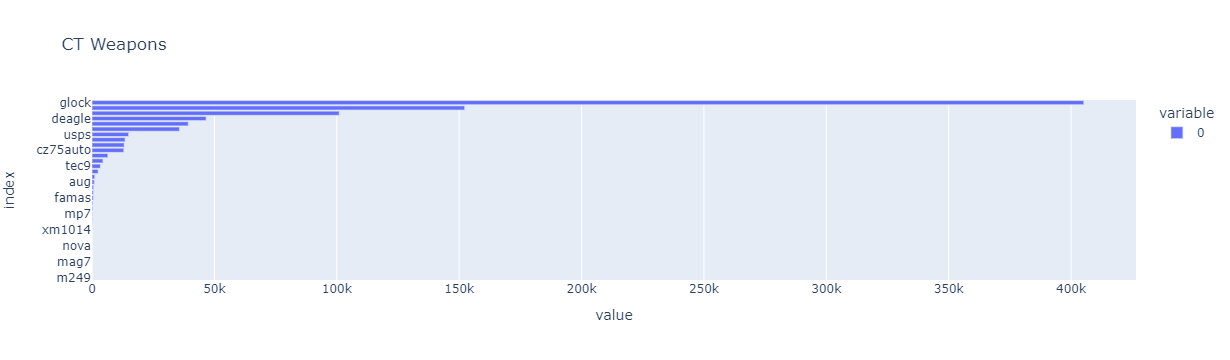

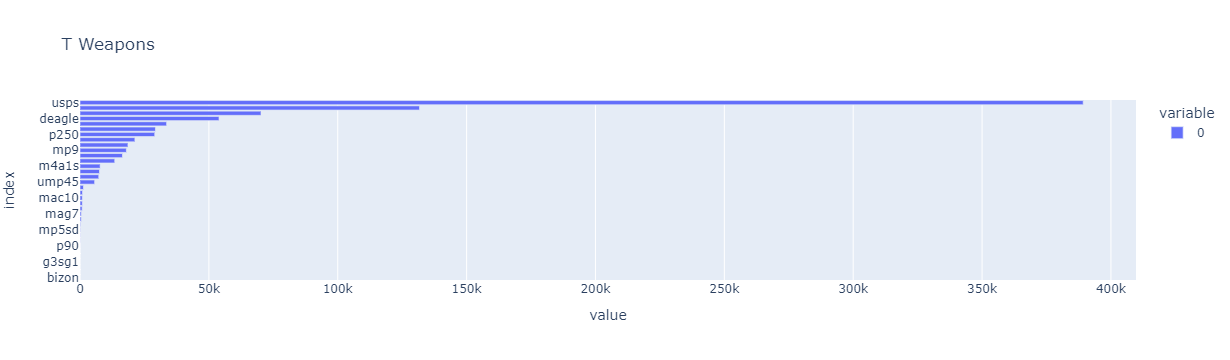

In [140]:
# Weapons Percentage
weapons = [
    "ct_weapon_ak47",
    "t_weapon_ak47",
    "ct_weapon_aug",
    "t_weapon_aug",
    "ct_weapon_awp",
    "t_weapon_awp",
    "ct_weapon_bizon",
    "t_weapon_bizon",
    "ct_weapon_cz75auto",
    "t_weapon_cz75auto",
    "ct_weapon_elite",
    "t_weapon_elite",
    "ct_weapon_famas",
    "t_weapon_famas",
    "ct_weapon_g3sg1",
    "t_weapon_g3sg1",
    "ct_weapon_galilar",
    "t_weapon_galilar",
    "ct_weapon_glock",
    "t_weapon_glock",
    "ct_weapon_m249",
    "t_weapon_m249",
    "ct_weapon_m4a1s",
    "t_weapon_m4a1s",
    "ct_weapon_m4a4",
    "t_weapon_m4a4",
    "ct_weapon_mac10",
    "t_weapon_mac10",
    "ct_weapon_mag7",
    "t_weapon_mag7",
    "ct_weapon_mp5sd",
    "t_weapon_mp5sd",
    "ct_weapon_mp7",
    "t_weapon_mp7",
    "ct_weapon_mp9",
    "t_weapon_mp9",
    "ct_weapon_negev",
    "t_weapon_negev",
    "ct_weapon_nova",
    "t_weapon_nova",
    "ct_weapon_p90",
    "t_weapon_p90",
    "ct_weapon_r8revolver",
    "t_weapon_r8revolver",
    "ct_weapon_sawedoff",
    "t_weapon_sawedoff",
    "ct_weapon_scar20",
    "t_weapon_scar20",
    "ct_weapon_sg553",
    "t_weapon_sg553",
    "ct_weapon_ssg08",
    "t_weapon_ssg08",
    "ct_weapon_ump45",
    "t_weapon_ump45",
    "ct_weapon_xm1014",
    "t_weapon_xm1014",
    "ct_weapon_deagle",
    "t_weapon_deagle",
    "ct_weapon_fiveseven",
    "t_weapon_fiveseven",
    "ct_weapon_usps",
    "t_weapon_usps",
    "ct_weapon_p250",
    "t_weapon_p250",
    "ct_weapon_p2000",
    "t_weapon_p2000",
    "ct_weapon_tec9",
    "t_weapon_tec9",
]

t_weapons = list(filter(lambda el: el[0:1] == "t", weapons))
display(
    assemble_df_weapons(all_data, t_weapons)
    .sum()
    .sort_values(ascending=True)
    .plot.barh(title="CT Weapons")
)
ct_weapons = list(filter(lambda el: el[0:2] == "ct", weapons))
display(
    assemble_df_weapons(all_data, ct_weapons)
    .sum()
    .sort_values(ascending=True)
    .plot.barh(title="T Weapons")
)

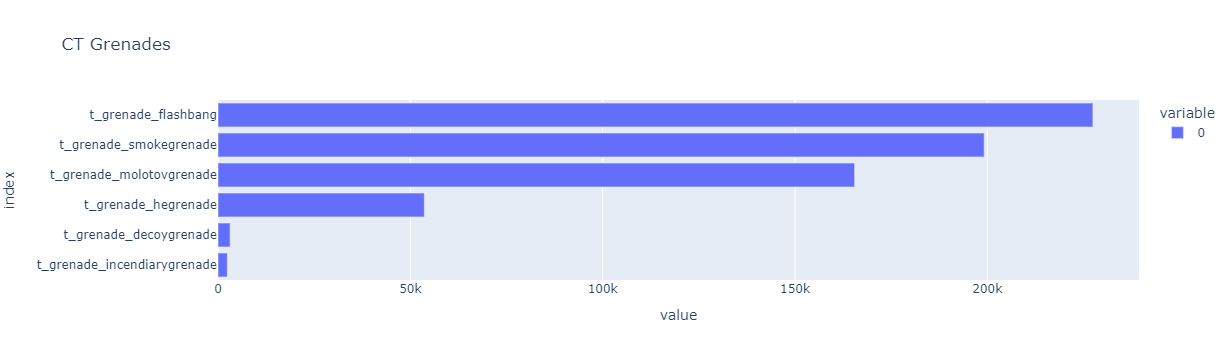

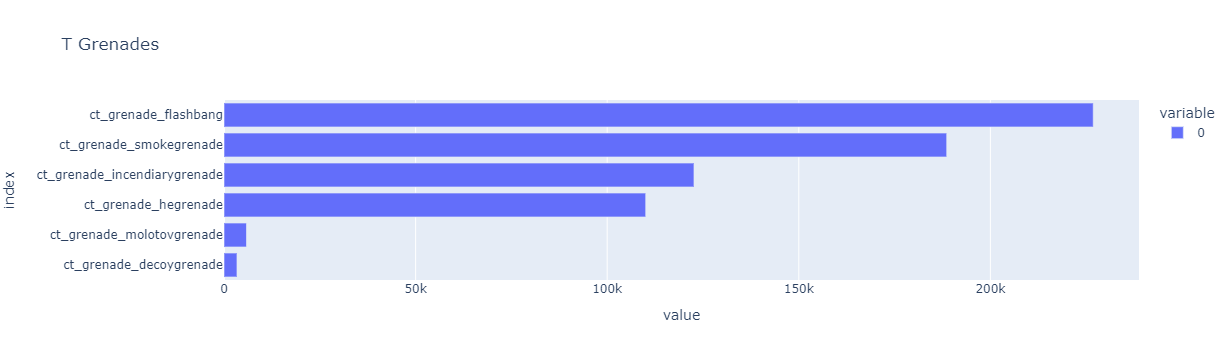

In [141]:
grenades = [
    "ct_grenade_hegrenade",
    "t_grenade_hegrenade",
    "ct_grenade_flashbang",
    "t_grenade_flashbang",
    "ct_grenade_smokegrenade",
    "t_grenade_smokegrenade",
    "ct_grenade_incendiarygrenade",
    "t_grenade_incendiarygrenade",
    "ct_grenade_molotovgrenade",
    "t_grenade_molotovgrenade",
    "ct_grenade_decoygrenade",
    "t_grenade_decoygrenade",
]

t_grenades = list(filter(lambda el: el[0:1] == "t", grenades))
display(
    assemble_df_weapons(all_data, t_grenades)
    .sum()
    .sort_values(ascending=True)
    .plot.barh(title="CT Grenades")
)
ct_grenades = list(filter(lambda el: el[0:2] == "ct", grenades))
display(
    assemble_df_weapons(all_data, ct_grenades)
    .sum()
    .sort_values(ascending=True)
    .plot.barh(title="T Grenades")
)

In [5]:
parser = Parser()
treat_data = parser.create_round_column(all_data.copy())
treat_data = parser.classify_weapons(treat_data.copy())
treat_data = parser.create_round_winner_columns(treat_data.copy())

In [6]:
treat_data["pistol_round"] = treat_data.apply(
    round_classifier.define_pistol_round, axis=1
)

# Defining eco rounds
treat_data["ct_eco"] = treat_data.apply(round_classifier.define_full_ct_eco, axis=1)
treat_data["t_eco"] = treat_data.apply(round_classifier.define_full_t_eco, axis=1)

# Defining force buy rounds
treat_data["ct_force"] = treat_data.apply(
    round_classifier.define_force_ct_round, axis=1
)
treat_data["t_force"] = treat_data.apply(round_classifier.define_force_t_round, axis=1)

In [7]:
# Não acho que são as colunas certas pra analisar, mas só um exemplo do que podemos fazer

n_bins = 7
lower, higher = thresholds.prepare(treat_data.copy(), "ct_health")
treat_data["ct_health_thresholds"] = thresholds.build(
    treat_data.copy(), "ct_health", lower, higher, n_bins
)
treat_data["ct_health_thresholds_num"] = thresholds.build_numerical(
    treat_data.copy(), "ct_health", lower, higher, n_bins
)

In [8]:
# Não acho que são as colunas certas pra analisar, mas só um exemplo do que podemos fazer

n_bins = 7
lower, higher = thresholds.prepare(treat_data.copy(), "t_health")
treat_data["t_health_thresholds"] = thresholds.build(
    treat_data.copy(), "t_health", lower, higher, n_bins
)
treat_data["t_health_thresholds_num"] = thresholds.build_numerical(
    treat_data.copy(), "t_health", lower, higher, n_bins
)

In [20]:
# Selecting columns
normal_columns = all_columns[0:16].tolist()
made_columns_t = [
    "t_main_rifle",
    "t_sec_rifle",
    "t_force_weapons",
    "t_weak_pistols",
    "t_strong_pistols",
    "t_granades",
    "t_weapon_awp",
    "t_eco",
    "t_force",
]
made_columns_ct = [
    "ct_main_rifle",
    "ct_sec_rifle",
    "ct_force_weapons",
    "ct_weak_pistols",
    "ct_strong_pistols",
    "ct_granades",
    "ct_weapon_awp",
    "ct_eco",
    "ct_force",
]
extra_columns = [
    "pistol_round",
    "round",
    "round_winner",
    "round_winner_t",
    "round_winner_ct",
    "t_health_thresholds",
    "t_health_thresholds_num",
    "ct_health_thresholds",
    "ct_health_thresholds_num",
]
selected_columns = normal_columns + made_columns_ct + made_columns_t + extra_columns

# Getting only columns selected columns
final_df = treat_data[selected_columns]

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   time_left                 122410 non-null  float64 
 1   ct_score                  122410 non-null  float64 
 2   t_score                   122410 non-null  float64 
 3   map                       122410 non-null  object  
 4   bomb_planted              122410 non-null  bool    
 5   ct_health                 122410 non-null  float64 
 6   t_health                  122410 non-null  float64 
 7   ct_armor                  122410 non-null  float64 
 8   t_armor                   122410 non-null  float64 
 9   ct_money                  122410 non-null  float64 
 10  t_money                   122410 non-null  float64 
 11  ct_helmets                122410 non-null  float64 
 12  t_helmets                 122410 non-null  float64 
 13  ct_defuse_kits            122

In [22]:
# checando nans
final_df.isna().sum()

time_left                   0
ct_score                    0
t_score                     0
map                         0
bomb_planted                0
ct_health                   0
t_health                    0
ct_armor                    0
t_armor                     0
ct_money                    0
t_money                     0
ct_helmets                  0
t_helmets                   0
ct_defuse_kits              0
ct_players_alive            0
t_players_alive             0
ct_main_rifle               0
ct_sec_rifle                0
ct_force_weapons            0
ct_weak_pistols             0
ct_strong_pistols           0
ct_granades                 0
ct_weapon_awp               0
ct_eco                      0
ct_force                    0
t_main_rifle                0
t_sec_rifle                 0
t_force_weapons             0
t_weak_pistols              0
t_strong_pistols            0
t_granades                  0
t_weapon_awp                0
t_eco                       0
t_force   

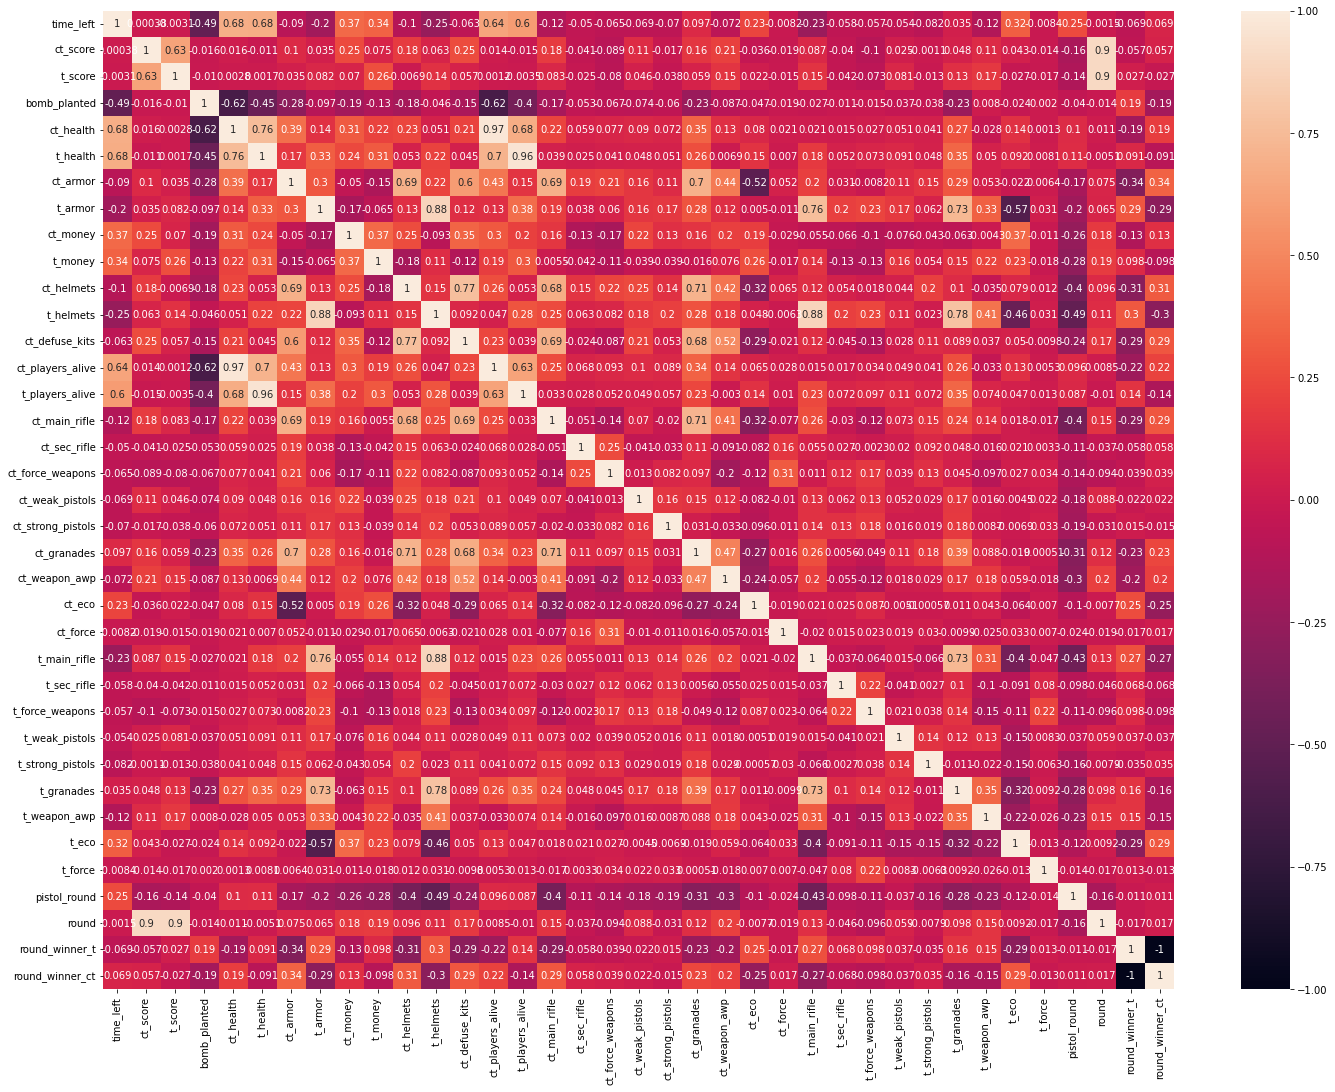

In [23]:
# Visualizando as correlações
plt.subplots(figsize=(24, 18))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

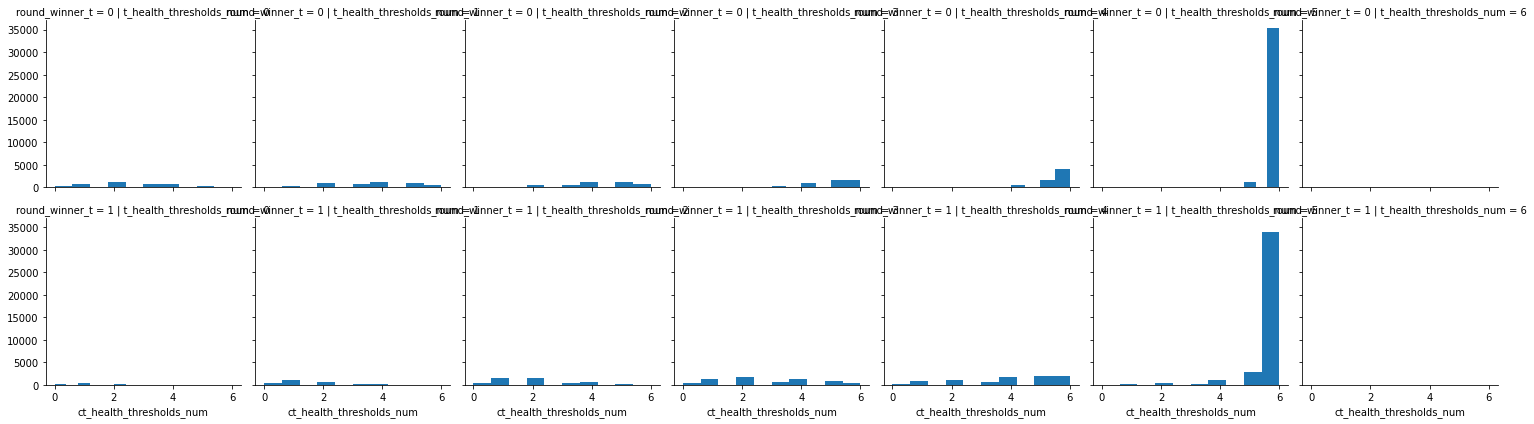

In [14]:
# Não acho que são as colunas certas pra analisar, mas só um exemplo do que podemos fazer

g = sns.FacetGrid(
    final_df,
    row="round_winner_t",
    col="t_health_thresholds_num",
)
g = g.map(plt.hist, "ct_health_thresholds_num")
plt.show()

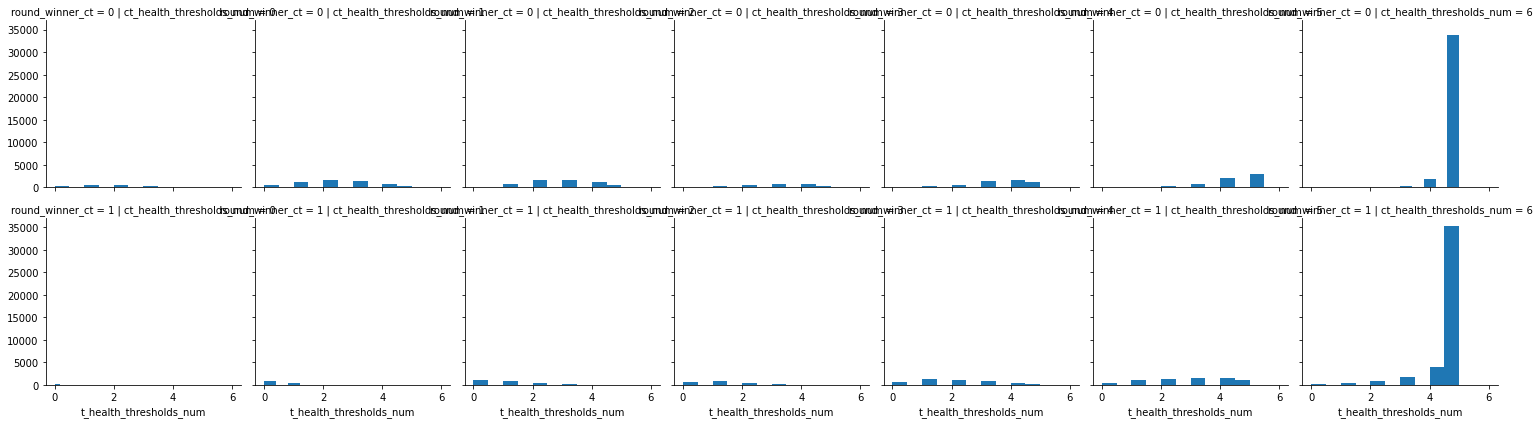

In [15]:
# Não acho que são as colunas certas pra analisar, mas só um exemplo do que podemos fazer

g = sns.FacetGrid(
    final_df,
    row="round_winner_ct",
    col="ct_health_thresholds_num",
)
g = g.map(plt.hist, "t_health_thresholds_num")
plt.show()

In [16]:
ct_health = (
    final_df.groupby(["ct_health_thresholds_num", "round_winner_ct"]).size().unstack(1)
)
t_health = (
    final_df.groupby(["t_health_thresholds_num", "round_winner_t"]).size().unstack(1)
)

<AxesSubplot:xlabel='ct_health_thresholds_num'>

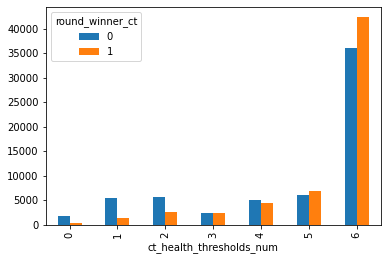

In [17]:
ct_health.plot(kind="bar")

<AxesSubplot:xlabel='t_health_thresholds_num'>

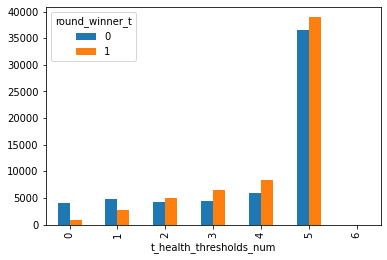

In [18]:
t_health.plot(kind="bar")